## Introduction to Lab 2

It’s now time for Lab 2. Because you’re using your personal AWS account, you should be able to start from where you stopped at the end of Lab 1, and continue to build the application.

In this lab, you will continue to build the Dragons application. First, you will build the REST application programming interface (API) that’s used to list and add dragons. You will create the API by using mock integrations. You can use mock integrations to create a testable API before you write any code for your backend services.

After the API is created, you will deploy an updated version of the web application. The web application contains the frontend logic to access the GET and POST methods of your /dragons resource.

If you have questions about the lab, it’s likely that you’re not alone. Use the discussion forum to post questions to your peers in the course, and we also encourage you to answer other learners’ questions. Have fun! 

<pre>

    
</pre>
## Exercise 2: Amazon API Gateway  
https://aws-tc-largeobjects.s3.amazonaws.com/DEV-AWS-MO-BuildingRedux/exercise-2-api-mocks.html

<b>Note</b>
The exercises in this course will have an associated charge in your AWS account. In this exercise, you will create the following resource:

Amazon API Gateway REST application programming interface (API)
The final exercise includes instructions to delete all the resources that you create in the exercises.

Familiarize yourself with Amazon API Gateway pricing and the AWS Free Tier.

### Exercise 2: Amazon API Gateway

In this exercise, you build the REST API that’s used to list and add dragons. You first create the API by using mock integrations. You can use mock integrations to create a testable API before any code is written for your backend services.

After the API is created, you deploy an updated version of the web application. The web application now contains the frontend logic to access the GET and POST methods of your /dragons resource.

Later in the course, we will discuss authentication for the API and implement the backend services.

### Task 1: Creating a REST API

In this task, you will build the REST API. The REST API will have a single resource, /dragons, with GET and POST methods.

1. In the console, open the Amazon API Gateway dashboard by searching for and choosing API Gateway.

2. Make sure you are in the N. Virginia Region.

3. If you already have APIs, choose Create API. If not, continue to the next instruction.

4. Under Choose an API type, locate REST API, and choose Build.

    <b>Note:</b> Do not select the REST API Private option because you will access this API from the internet.

5. If this API is your first one, close the Create your first API window by choosing OK. You should be presented with a sample PetStore API. You won’t be using this data, so select the New API option.

6.In the Create page, configure the following settings.
    * API name: `DragonsApp`
    * Endpoint type: Keep the default setting of Regional

7. Choose Create API.

### Task 2: Creating a mock integration for the GET method

In this task, you will create the /dragons resource and add a GET method. For now, you will configure the GET method with a mock integration.

1. After you create the REST API, you will be redirected to the Resources navigation pane. Your API currently has a single root-level resource.
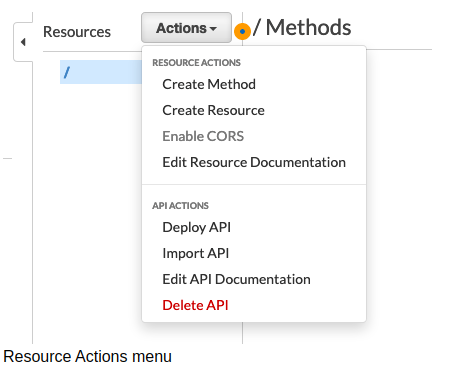
  
2. In the Resources navigation pane, select Actions > Create Resource.

3. In Resource Name, enter dragons.

4. In Resource Path, enter dragons.

5. Choose Create Resource.

6. In the Resources navigation pane, ensure that the /dragons resource is selected.

7. Select Actions > Create Method.

8. Under the /dragons resource, you should see a selection menu for methods. Choose the menu and select GET.

9. Save the new method by choosing the check icon.
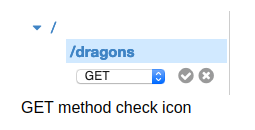
  
10. For Integration type, select Mock.

11. Choose Save.

12. In the Resources navigation pane, you should see that the GET method for /dragons is selected. On the right, choose Integration Response.

13. In the table, expand the single default mapping, and then expand Mapping Templates.

14. Under Content-Type, choose Add mapping template. Then enter application/json, and choose the check icon to save your changes.

15. In the text area under Generate Template, paste the Apache Velocity Template (VTL) code. You can copy this code from the following expandable section.

    The VTL code contains a JavaScript Object Notation (JSON) array. Ensure that you are copying all the code, including the opening bracket and the closing bracket.

    > <b>Expand for mapping template VTL.</b>

16. Under the template box, choose Save.

### Task 3: Deploying the API

You have designed the first steps of your API. Next, you will deploy the API to a stage, where you can test the resource method in a browser.

1. Select Actions > Deploy API.

2. In the Deploy API window, configure the following settings.
    * Deployment stage: `[New Stage]`
    * Stage name: `prod`

3. Choose Deploy.

    You will be redirected to the Stages navigation pane.

4. In the Stages navigation pane, expand the prod stage.

5. Choose the GET method for the /dragons resource. On the right, you will see an Invoke URL for the selected method.

6. Copy the Invoke URL. It will be in a format that is similar to https://abcde01234.execute-api.us-east-1.amazonaws.com/prod/dragons. Paste this URL into a file, so that you can refer to it later in the exercise.

7. Paste the URL into a new browser tab and confirm that you see the expected JSON output from the VTL that you configured previously.

8. Experiment by adding some query strings to the URL, for example:

    `/prod/dragons?family=red`
    
    `/prod/dragons?family=blue`
    
    `/prod/dragons?dragonName=Atlas`

### Task 4: Creating a dragon model

In this task, you will create a dragon model that will be used to validate the POST method.

1. In the navigation pane, under API: DragonsApp, choose Models.

2. Choose Create.

3. In the New Model page, configure the following settings.
    * Model name: dragon
    * Content type: application/json
    * Model schema: Paste the following JSON schema

```
    {
      "$schema": "http://json-schema.org/draft-07/schema#",
      "title": "Dragon",
      "type": "object",
      "properties": {
        "dragonName": { "type": "string" },
        "description": { "type": "string" },
        "family": { "type": "string" },
        "city": { "type": "string" },
        "country": { "type": "string" },
        "state": { "type": "string" },
        "neighborhood": { "type": "string" },
        "reportingPhoneNumber": { "type": "string" },
        "confirmationRequired": { "type": "boolean" }
      }
    }
```

4. Choose Create model.

### Task 5: Creating a mock integration for the POST method

In this task, you will create a POST method for the /dragons resource. Now that you have configured validation, you can test different request bodies. This feature of API Gateway handles much of the validation for you, which means that you can focus on your code.

1. To return to the resources pane, locate the navigation pane and under API: DragonsApp, choose Resources.

2. In the Resources navigation pane, choose /dragons.

3. Select Actions > Create Method.

4. Choose the menu of methods for the /dragons resource and select POST.

5. Save the new POST method by choosing the check icon.

6. For Integration type, select Mock.

7. Choose Save.

8. In the Resources navigation pane, you should see that the POST method for /dragons is selected. On the right, choose Method Request.

9. Next to Request Validator, choose the pencil (edit) icon and select Validate body.

10. Save this setting by choosing the check (update) icon.

11. Expand the Request Body section.

12. Under Content type, choose Add model and configure the following settings:
    * Content type box: `application/json`
    * Model name: `dragon`
    
13. Save this setting by choosing the check (create) icon.

    Next, you will test the request validation before you deploy the API.

14. To return to the method execution view, in the top area of the window, choose ← Method Execution.

15. Choose TEST ⚡.

16. First, test with a valid request body. For Request Body, paste the following valid JSON data for a dragon:
```
    {
      "dragonName": "Frank",
      "description": "This dragon is brand new, we don't know much about it yet.",
      "family": "purple",
      "city": "Seattle",
      "country": "USA",
      "state": "WA",
      "neighborhood": "Downtown",
      "reportingPhoneNumber": "15555555555",
      "confirmationRequired": false
    }
```
17. Choose ⚡ Test.

18. On the right, observe a successful validation. In Logs, you will see Request validation succeeded for content type application/json.

19. Now, try testing the method with data that will not validate, such as an empty request body or a non-valid property:
```
    {
      "dragonName": "Frank",
      "description": "This dragon is brand new, we don't know much about it yet.",
      "family": "purple",
      "city": "Seattle",
      "country": "USA",
      "state": "WA",
      "neighborhood": "Downtown",
      "reportingPhoneNumber": "15555555555",
      "confirmationRequired": "no, thank you"
    }
```

### Task 6: Enabling CORS and deploying the API

The APIs will be accessed from a web application that is served on a different domain than the APIs. A request from a web application to another domain is called a cross-origin HTTP request.

To allow the browser to use resources from another domain, you will enable Cross-Origin Resource Sharing (CORS) for the /dragons resource. For additional information, see Enabling CORS for a REST API resource in the Amazon API Gateway Developer Guide.

1. In the Resources navigation pane, choose /dragons.

2. Select Actions > Enable CORS.

3. Choose Enable CORS and replace existing CORS headers.

4. Confirm the action by choosing Yes, replace existing values.

5. Now, deploy your changes to the prod resource. Select Actions > Deploy API.

6. For Deployment stage, select prod.

7. Choose Deploy.

### Task 7: Updating and testing the web application

In this task, you will deploy an updated edition of the web application and use it to communicate with the newly mocked API.

The updated web application is available at `https://aws-tc-largeobjects.s3.amazonaws.com/DEV-AWS-MO-BuildingRedux/downloads/webapp2.zip`. You might want to attempt the deployment yourself before you follow the step-by-step instructions.

In the AWS Cloud9 or local IDE terminal, download and extract the web application.

    `wget https://aws-tc-largeobjects.s3.amazonaws.com/DEV-AWS-MO-BuildingRedux/downloads/webapp2.zip`
    `unzip webapp2.zip -d ~/webapp2`

2. Copy all the contents of the webapp2 folder to Amazon Simple Storage Service (Amazon S3).

    `aws s3 cp ~/webapp2 s3://$MYBUCKET/dragonsapp/ --recursive --acl public-read`
   
3. Run the following AWS Command Line Interface (AWS CLI) command.

    `echo "URL: https://$MYBUCKET.s3.amazonaws.com/dragonsapp/index.html"`
   
4. Visit the Dragons web application by pasting the URL output into a web browser.

5. On the Home page of your application, under Dragons Endpoint, enter the invoke URL that you previously saved into a file.

6. At the end of the invoke URL, delete the dragons resource. For example, `https://abcde01234.execute-api.us-east-1.amazonaws.com/prod/dragons becomes https://abcde01234.execute-api.us-east-1.amazonaws.com/prod/.`
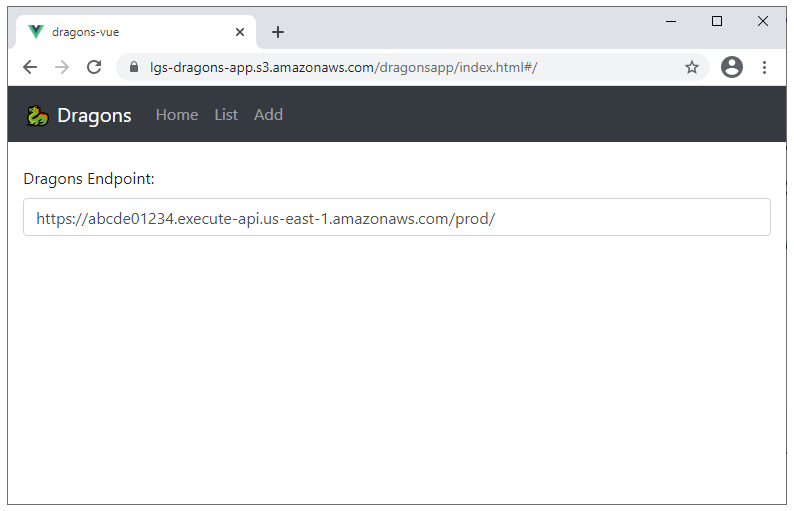
  
7. In the web application, choose List and then choose GET /dragons. You should see the API response in a table. You can experiment with some different values for Name and Family.

8. In the web application, choose Add.

9. Enter values for a new dragon observation, and choose POST /dragons. A successful post will clear the form for another observation to be entered.